Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [23]:
using NBInclude
@nbinclude("../../../Single Particle/Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")

get_Hofstadter_hamiltonian (generic function with 1 method)

In [24]:
LL = [3, 3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]
t=-1
p=1
q=3
ϕ=p/q
pbc=true
param_dict=Dict{}()
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ
coordinates, sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];

In [25]:
using QuantumOptics

## Initial Parameters

In [232]:
N1 = 150
N2 = 150
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

## Create Single-Particle Operator

In [233]:
function Op_Sp(sites,neighbors_list,
               site_number,site_coord,
               nb,LL,param_dict,pbc)

    H_T = get_Hofstadter_hamiltonian(sites,neighbors_list,
                                    site_number,site_coord,
                                    nb,LL,param_dict,pbc)
    N = LL[1]*LL[2]
    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 2 methods)

In [234]:
H_T = get_Hofstadter_hamiltonian(sites,neighbors_list,
                                    site_number,site_coord,
                                    length(vv_basis),LL,param_dict,pbc)

9×9 Matrix{ComplexF64}:
       0.0+0.0im            -1.0+0.0im       …        0.0+0.0im
      -1.0-0.0im             0.0+0.0im                0.0+0.0im
 -0.876307-0.481754im       -1.0-0.0im          -0.876307+0.481754im
      -1.0-0.0im             0.0+0.0im                0.0+0.0im
       0.0+0.0im            -1.0-0.0im                0.0+0.0im
       0.0+0.0im             0.0+0.0im       …       -1.0-0.0im
 -0.876307-0.481754im        0.0+0.0im           0.855364+0.518027im
       0.0+0.0im       -0.876307-0.481754im           0.5-0.866025im
       0.0+0.0im             0.0+0.0im                0.0+0.0im

In [235]:
tx = ty = 0
Op_Sp(sites,neighbors_list,
               site_number,site_coord,
               length(vv_basis),LL,param_dict,pbc)

Operator(dim=9x9)
  basis: NLevel(N=9)sparse([2, 3, 4, 7, 1, 3, 5, 8, 1, 2  …  8, 9, 2, 5, 7, 9, 3, 6, 7, 8], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  7, 7, 8, 8, 8, 8, 9, 9, 9, 9], ComplexF64[-1.0 + 0.0im, -0.8763066800438635 - 0.4817536741017154im, -1.0 + 0.0im, -0.8763066800438635 - 0.4817536741017154im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -0.8763066800438635 - 0.4817536741017154im, -0.8763066800438635 + 0.4817536741017154im, -1.0 + 0.0im  …  0.5000000000000004 + 0.8660254037844386im, 0.8553642601605069 - 0.5180270093731298im, -0.8763066800438635 + 0.4817536741017154im, -1.0 + 0.0im, 0.5000000000000004 - 0.8660254037844386im, 0.5000000000000004 + 0.8660254037844386im, -0.8763066800438635 + 0.4817536741017154im, -1.0 + 0.0im, 0.8553642601605069 + 0.5180270093731298im, 0.5000000000000004 - 0.8660254037844386im], 9, 9)

## Create Many-Basis for Non-interacting system

In [236]:
function get_mb_op(PN, op)
    
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)
    
    H = SparseOperator(basis_mb) 
    for m in 1:N
        for n in 1:N
            H += op.data[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
end

get_mb_op (generic function with 1 method)

# Hamiltonian

In [237]:
function HH(sites,neighbors_list,
           site_number,site_coord,
           nb,LL,param_dict,pbc,PN)
    
    op = Op_Sp(sites,neighbors_list,
           site_number,site_coord,
           length(vv_basis),LL,param_dict,pbc)
    
    H_mb = get_mb_op(PN, op)
    
    return H_mb
end

HH (generic function with 2 methods)

In [238]:
PN=2
H = HH(sites,neighbors_list,
site_number,site_coord,
length(vv_basis),LL,param_dict,tx,ty,pbc,PN);
eigen(dense(H).data)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
45-element Vector{Float64}:
 -5.464101615137781
 -5.464101615137772
 -5.464101615137769
 -5.464101615137767
 -5.464101615137751
 -5.464101615137711
 -2.000000000000006
 -2.000000000000002
 -1.9999999999999993
 -1.999999999999999
 -1.9999999999999976
 -1.999999999999996
 -1.9999999999999936
  ⋮
  2.732050807568877
  2.7320508075688776
  2.7320508075688776
  2.732050807568878
  2.7320508075688794
  2.7320508075688807
  3.9999999999999987
  3.9999999999999996
  4.000000000000001
  4.000000000000002
  4.000000000000002
  4.0000000000000036
vectors:
45×45 Matrix{ComplexF64}:
  -0.0286845-0.205787im    …    0.0384837-0.12011im
  -0.0428353-0.108385im         -0.149699-0.0385736im
    0.016031-0.0659275im        0.0952748+0.208434im
  -0.0632407-0.280961im        -0.0753314+0.124706im
   0.0663033+0.00212248im        0.207239-0.0234479im
  -0.0277218+0.108513im    …   -0.0623511-0.194084im
  -0.0207833-0.339828im         

In [239]:
# CHECK: MB Structure (PN=1)
#eigenenergies(dense(H_mb)) == eigvals(HSP_T(Nx, Ny, 1/q, Tx, Ty, 0))
# eigenenergies(dense(get_mb_op(basis_mb, op)))

In [240]:
# # Ortogonality Check !
# E, V = eigen(dense(get_mb_op(basis_mb, op)).data)
# dot(V[:,1],V[:,2])
# norm(V)

# Cherns

Berry Curvature:
\begin{equation}
\mathcal{F}(\vec{\theta}) = \log \left( U_x(\vec{\theta})U_y(\vec{\theta}+\delta_x)U_x(\vec{\theta}+\delta_y)^{-1}U_y(\vec{\theta})^{-1} \right)
\end{equation}
Link variables:
\begin{equation}
U_\mu(\vec{\theta}) = \frac{
det \left( \Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) 
}{
| det \left(\Phi(\vec{\theta})^\dagger \Phi(\vec{\theta}+\delta_\mu) \right) |} , \quad \delta_x = \left(\frac{2\pi}{N_{\theta}},0 \right), \delta_y = \left(0, \frac{2\pi}{N_{\theta}}\right)
\end{equation}
Chern Number:
\begin{equation}
\mathcal{C} = \frac{1}{2\pi i} \sum_{\vec{\theta}} \mathcal{F}(\vec{\theta})
\end{equation}

In [241]:
# using LinearAlgebra
# PN=1
# tx = Tx[7]
# ty = Ty[1]
# H_mb = HH(sites,neighbors_list,
#            site_number,site_coord,
#            length(vv_basis),LL,param_dict, tx, ty, pbc,PN)
# E, U = eigen(dense(H_mb).data)
# E
# U

In [242]:
dimH = size(H)[1]

45

In [243]:
@nbinclude("../../Chern_parameter_space_sum.ipynb")

calc_F12 (generic function with 1 method)

In [244]:
Tx

150-element Vector{Float64}:
 0.0
 0.041887902047863905
 0.08377580409572781
 0.1256637061435917
 0.16755160819145562
 0.20943951023931953
 0.2513274122871834
 0.29321531433504733
 0.33510321638291124
 0.37699111843077515
 0.41887902047863906
 0.460766922526503
 0.5026548245743668
 ⋮
 5.780530482605219
 5.822418384653083
 5.864306286700947
 5.9061941887488105
 5.9480820907966745
 5.9899699928445385
 6.031857894892402
 6.073745796940266
 6.11563369898813
 6.157521601035994
 6.199409503083858
 6.241297405131722

In [245]:
EEA, UUA = calc_states_hofstadter_mb(Tx, Ty, dimH, sites,neighbors_list,
                                site_number,site_coord,
                                length(vv_basis),LL,param_dict,pbc,HH,PN);

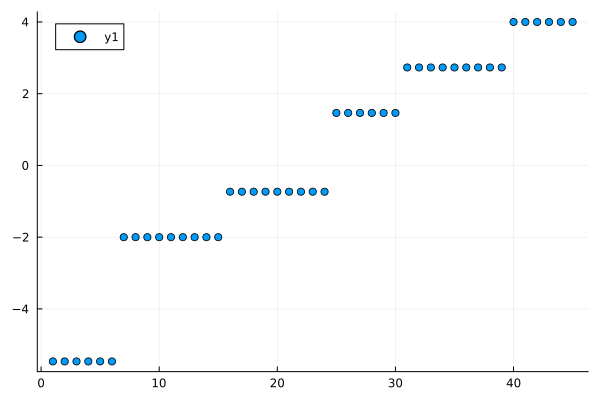

In [246]:
using Plots
scatter(real(EEA[1,1,:]))

In [247]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
bands2 = [[1,15], [16,30], [31,45]]
bands3 = [[1,24], [25,45]]

2-element Vector{Vector{Int64}}:
 [1, 24]
 [25, 45]

In [248]:
for band in bands
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

-4.000000000000002 + 5.121205951105386e-16im
3.0 - 3.46345357473774e-15im
-7.999999999999991 - 1.793466206416767e-15im
7.999999999999969 - 7.171132100956187e-16im
3.000000000000002 - 3.7972225230854e-15im
-4.000000000000001 + 2.6627358317934886e-15im


In [249]:
for band in bands2
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

-0.9999999999999998 + 7.563592938106327e-15im
1.999999999999999 + 5.3113517591457144e-15im
-0.9999999999999994 + 2.811185912402468e-15im


In [250]:
for band in bands3
    UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
    F12 = calc_F12(UU)
    println(sum(F12)/(2im*pi))
end

-5.000000000000015 - 1.6741149388415455e-15im
5.000000000000004 + 1.1955157937121056e-15im


In [150]:
UUA[1,1,:,1]'*UUA[1,1,:,1]

1.0 + 0.0im

In [151]:
UUA = OffsetArray(UUA, 0:N1-1, 0:N2-1, 0:dimH-1, 0:dimH-1)
UUA[1,1,:,:]

9×9 OffsetArray(::Matrix{ComplexF64}, 0:8, 0:8) with eltype ComplexF64 with indices 0:8×0:8:
  -0.227724+0.513248im     0.108487+0.0230596im    …   -0.410703-0.231253im
  -0.131384+0.388706im   -0.0115933+0.110303im         0.0293874+0.403802im
   0.038881+0.316818im      0.35177+0.174995im          0.270478-0.374042im
 -0.0721484+0.427378im   -0.0897285-0.0651916im         0.240697+0.368163im
  -0.184192+0.0613696im   -0.110911-2.51535e-17im      0.0505765-0.122546im
   0.118306-0.0873464im    0.387447+0.0651916im    …   -0.133002+0.332631im
 -0.0386375+0.377225im   -0.0243352-0.392139im         0.0470597-0.206568im
   0.105799+0.110983im    -0.250181+0.302944im        -0.0516903-0.117968im
        0.0+0.0im           0.57735-0.0im                    0.0+0.0im

In [152]:
calc_link_var(UUA[1,6,:,1], UUA[9,1,:,1])

0.9833994827045871 - 0.18145373354205335im

In [153]:
UU = calc_link_vars(UUA[:,:,:,1:2])

10×10×2 OffsetArray(::Array{ComplexF64, 3}, 0:9, 0:9, 0:1) with eltype ComplexF64 with indices 0:9×0:9×0:1:
[:, :, 0] =
 0.00163509+0.999999im   0.285763+0.9583im     …    0.857324-0.514777im
    0.48143+0.876485im  -0.982476+0.186389im       -0.697065+0.717008im
  -0.978167+0.207821im   0.604138+0.79688im        -0.985228+0.171246im
    0.78589-0.618367im  -0.380902+0.924615im       -0.570605+0.821225im
  -0.972366+0.23346im     0.32284-0.946454im        0.467586+0.883948im
  -0.760918-0.648848im   0.998838-0.0481857im  …   -0.970078-0.242794im
 -0.0914562-0.995809im  -0.853892-0.520451im        -0.25856-0.965995im
  -0.992672+0.120841im  -0.808415+0.588613im        0.279452+0.96016im
   0.980437-0.196833im   0.380447+0.924803im      -0.0076575-0.999971im
   0.955999+0.293371im  -0.955126-0.296201im      -0.0458815+0.998947im

[:, :, 1] =
 -0.921215-0.389054im    0.935704-0.352786im  …  -0.819825+0.572615im
 -0.165691+0.986178im   -0.615573-0.78808im      -0.408947+0.912558im
 0.04592

In [154]:
UU[:,:,0]

10×10 OffsetArray(::Matrix{ComplexF64}, 0:9, 0:9) with eltype ComplexF64 with indices 0:9×0:9:
 0.00163509+0.999999im   0.285763+0.9583im     …    0.857324-0.514777im
    0.48143+0.876485im  -0.982476+0.186389im       -0.697065+0.717008im
  -0.978167+0.207821im   0.604138+0.79688im        -0.985228+0.171246im
    0.78589-0.618367im  -0.380902+0.924615im       -0.570605+0.821225im
  -0.972366+0.23346im     0.32284-0.946454im        0.467586+0.883948im
  -0.760918-0.648848im   0.998838-0.0481857im  …   -0.970078-0.242794im
 -0.0914562-0.995809im  -0.853892-0.520451im        -0.25856-0.965995im
  -0.992672+0.120841im  -0.808415+0.588613im        0.279452+0.96016im
   0.980437-0.196833im   0.380447+0.924803im      -0.0076575-0.999971im
   0.955999+0.293371im  -0.955126-0.296201im      -0.0458815+0.998947im

In [155]:
UU = OffsetArrays.no_offset_view(UU)

10×10×2 Array{ComplexF64, 3}:
[:, :, 1] =
 0.00163509+0.999999im   0.285763+0.9583im     …    0.857324-0.514777im
    0.48143+0.876485im  -0.982476+0.186389im       -0.697065+0.717008im
  -0.978167+0.207821im   0.604138+0.79688im        -0.985228+0.171246im
    0.78589-0.618367im  -0.380902+0.924615im       -0.570605+0.821225im
  -0.972366+0.23346im     0.32284-0.946454im        0.467586+0.883948im
  -0.760918-0.648848im   0.998838-0.0481857im  …   -0.970078-0.242794im
 -0.0914562-0.995809im  -0.853892-0.520451im        -0.25856-0.965995im
  -0.992672+0.120841im  -0.808415+0.588613im        0.279452+0.96016im
   0.980437-0.196833im   0.380447+0.924803im      -0.0076575-0.999971im
   0.955999+0.293371im  -0.955126-0.296201im      -0.0458815+0.998947im

[:, :, 2] =
 -0.921215-0.389054im    0.935704-0.352786im  …  -0.819825+0.572615im
 -0.165691+0.986178im   -0.615573-0.78808im      -0.408947+0.912558im
 0.0459272-0.998945im    0.238235+0.971207im      0.848795-0.528722im
  0.669975-0.742

In [156]:
F12 = calc_F12(UU)
sum(F12)/(2*pi*1im)

-2.518429760051489 + 8.661541324215172im

In [1]:
using NBInclude
@nbinclude("../Hofstadter Single Particle in Theta Space.ipynb")
using QuantumOptics
using LinearAlgebra

In [2]:
Nx=Ny=3
N=Nx*Ny
p=1
q=Ny
alpha=p/q
PN=2
N1 = 10
N2 = 10
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

In [3]:
function Op_Sp(Nx, Ny, alpha, Tx, Ty)
    
    H_T = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
   
    N = Nx*Ny
    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 1 method)

In [8]:
HSP_T(Nx, Ny, alpha, 0, 0, 0)

9×9 Matrix{ComplexF64}:
  0.0+0.0im  -1.0+0.0im  -1.0-0.0im  …   0.0+0.0im        0.0+0.0im
 -1.0-0.0im   0.0+0.0im  -1.0+0.0im     -1.0-0.0im        0.0+0.0im
 -1.0+0.0im  -1.0-0.0im   0.0+0.0im      0.0+0.0im       -1.0-0.0im
 -1.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im        0.0+0.0im
  0.0+0.0im  -1.0+0.0im   0.0+0.0im     -1.0+0.0im        0.0+0.0im
  0.0+0.0im   0.0+0.0im  -1.0+0.0im  …   0.0+0.0im       -1.0+0.0im
 -1.0-0.0im   0.0+0.0im   0.0+0.0im      0.5-0.866025im   0.5+0.866025im
  0.0+0.0im  -1.0-0.0im   0.0+0.0im      0.0+0.0im        0.5-0.866025im
  0.0+0.0im   0.0+0.0im  -1.0-0.0im      0.5+0.866025im   0.0+0.0im

In [17]:
op = Op_Sp(Nx, Ny, alpha, Tx[1], Ty[1]);

In [24]:
basis = NLevelBasis(N)
states = bosonstates(basis, PN)
function get_mb_op(PN, op)
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)
    
    H = SparseOperator(basis_mb) 
    for m in 1:N
        for n in 1:N
            H += op.data[m,n] * transition(basis_mb, m, n)
            #H += H_T[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
end

get_mb_op (generic function with 2 methods)

In [19]:
En, Un = eigen(dense(get_mb_op(op, PN)).data)
En

45-element Vector{Float64}:
 -5.464101615137781
 -5.464101615137772
 -5.464101615137769
 -5.464101615137767
 -5.464101615137751
 -5.464101615137711
 -2.000000000000006
 -2.000000000000002
 -1.9999999999999993
 -1.999999999999999
 -1.9999999999999976
 -1.999999999999996
 -1.9999999999999936
  ⋮
  2.732050807568877
  2.7320508075688776
  2.7320508075688776
  2.732050807568878
  2.7320508075688794
  2.7320508075688807
  3.9999999999999987
  3.9999999999999996
  4.000000000000001
  4.000000000000002
  4.000000000000002
  4.0000000000000036

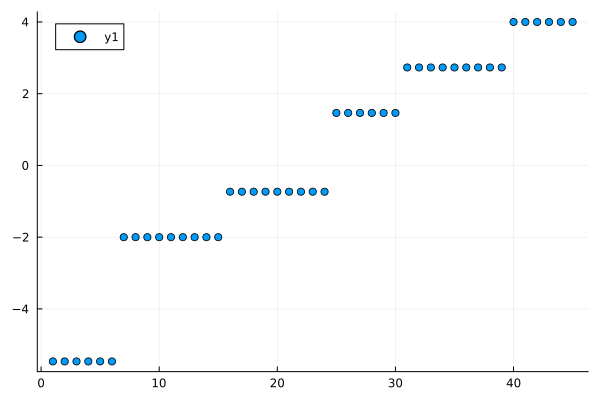

In [21]:
using Plots
scatter(En)

In [25]:
# executeme

function Chern_Nums(Tx, Ty, n1, n2)
    
    Sum=0
    
    for tx in range(start=1, stop=length(Tx))
        for ty in range(start=1, stop=length(Ty))
            
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty])
            H_mb = get_mb_op(PN, op)
            w1, v1 = eigen(dense(H_mb).data)
            i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]

            # if isapprox(v1[1,1], 0+0im, atol=0.001) == false
            #     v1 = v1 ./ v1[1,1]
            #     v1 = v1 / norm(v1)
            # end
            
            v1 = v1[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty])
            H_mb = get_mb_op(PN, op)
            w2, v2 = eigen(dense(H_mb).data)
            i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]

            # if isapprox(v2[1,1], 0+0im, atol=0.001) == false
            #     v2 = v2 ./ v2[1,1]
            #     v2 = v2 / norm(v2)
            # end
            
            v2 = v2[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx], Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w3, v3 = eigen(dense(H_mb).data)
            i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]


            # if isapprox(v3[1,1], 0+0im, atol=0.001) == false
            #     v3 = v3 ./ v3[1,1]
            #     v3 = v3 / norm(v3)
            # end
            
            v3 = v3[:,n1:n2]
            
            #------------------------------------
            op = Op_Sp(Nx, Ny, 1/q, Tx[tx]+dx, Ty[ty]+dy)
            H_mb = get_mb_op(PN, op)
            w4, v4 = eigen(dense(H_mb).data)
            i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]

            # if isapprox(v4[1,1], 0+0im, atol=0.001) == false
            #     v4 = v4 ./ v4[1,1]
            #     v4 = v4 / norm(v4)
            # end
            
            v4 = v4[:,n1:n2]
            
            #----------LINK VARIABLES------------
            U1=det(adjoint(v1)*v2)
            U1=U1/abs(U1)
            U2=det(adjoint(v2)*v4)
            U2=U2/abs(U2)
            U3=det(adjoint(v3)*v4)
            U3=U3/abs(U3)
            U4=det(adjoint(v1)*v3)
            U4=U4/abs(U4)
            
            #----------BERRY CURVATURE-----------
            F=log(U1*U2*1/U3*1/U4)
            Sum=Sum+F
            
        end
    end
    
    return 1/(2*pi*1im)*Sum
end

Chern_Nums (generic function with 1 method)

In [26]:
for i in 1:Int(length(states)/Nx):length(states)
    C = Chern_Nums(Tx, Ty, i, i+(Int(length(states)/Nx))-1)
    println(C)
end

1.0000000000000009 - 2.978836559575988e-16im
-1.9999999999999984 + 2.6773809916226116e-16im
0.9999999999999996 - 5.951461098289711e-17im


In [27]:
Chern_Nums(Tx, Ty, 1, 6)

3.9999999999999982 + 6.041190288522051e-17im

In [28]:
Chern_Nums(Tx, Ty, 7, 15)

-2.999999999999999 + 3.9212518912173246e-16im

In [31]:
Chern_Nums(Tx, Ty, 16, 24)

6.0046910114196645 + 1.3136413777245537e-16im

In [32]:
Chern_Nums(Tx, Ty, 25, 30)

-6.9939547502816435 - 2.870039916419332e-17im

In [33]:
Chern_Nums(Tx, Ty, 31, 39)

-3.0 - 2.1175657504475845e-16im

In [34]:
Chern_Nums(Tx, Ty, 40, 45)

3.999999999999999 - 1.4359258779187598e-16im